In [3]:
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import pandas as pd

In [4]:
uploaded = files.upload()

Saving diamonds.csv to diamonds (1).csv


In [5]:
df = pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.shape

(53947, 11)

In [7]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [8]:
df = df.drop(columns=['Unnamed: 0'])

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53947 entries, 0 to 53946
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53947 non-null  float64
 1   cut      53944 non-null  object 
 2   color    53946 non-null  object 
 3   clarity  53947 non-null  object 
 4   depth    53946 non-null  float64
 5   table    53947 non-null  float64
 6   price    53947 non-null  int64  
 7   x        53947 non-null  float64
 8   y        53947 non-null  float64
 9   z        53947 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 4.1+ MB


In [11]:
df.isnull().sum()

,0
carat,0
cut,3
color,1
clarity,0
depth,1
table,0
price,0
x,0
y,0
z,0


In [12]:
df = df.dropna(subset=["color", "depth", "cut",])


In [13]:
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [14]:
df.describe()

,carat,depth,table,price,x,y
count,53942.000000,53942.000000,53942.000000,53942.000000,53942.000000,53942.000000
mean,0.797949,61.749334,57.457204,3932.707779,5.731192,5.734560
std,0.474001,1.432572,2.234452,3989.406966,1.121741,1.142113
min,0.200000,43.000000,43.000000,-200.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000


In [15]:
print("Number of duplicated rows: ",df.duplicated().sum())

Number of duplicated rows:  153


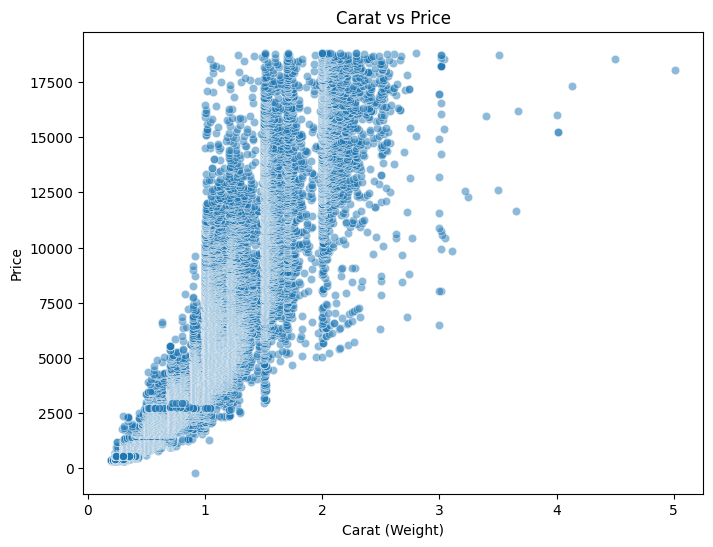

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="carat", y="price", alpha=0.5)
plt.title("Carat vs Price")
plt.xlabel("Carat (Weight)")
plt.ylabel("Price")
plt.show()


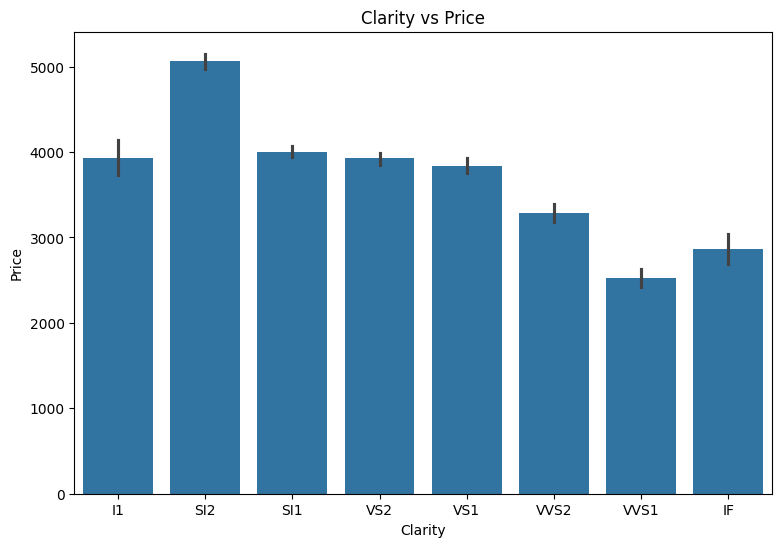

In [17]:
clarity_order = ["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]

plt.figure(figsize=(9,6))
sns.barplot(data=df, x="clarity", y="price", order=clarity_order)
plt.title("Clarity vs Price")
plt.xlabel("Clarity")
plt.ylabel("Price")
plt.show()


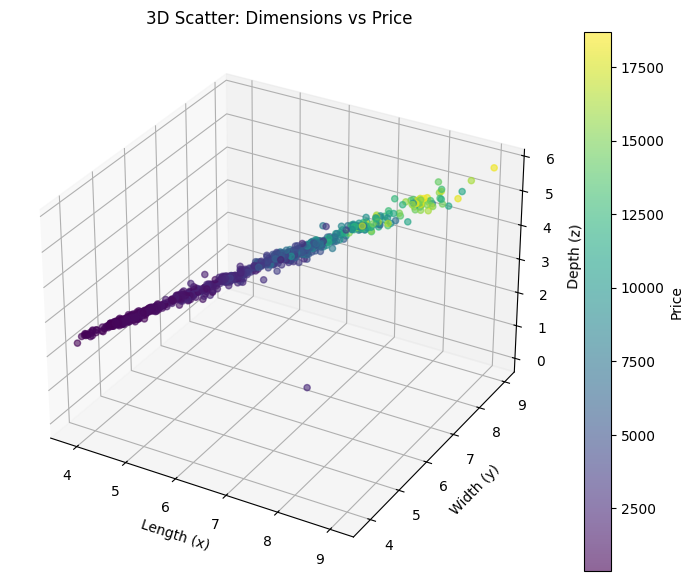

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported for pd.to_numeric and dropna

# Convert 'z' column to numeric, coercing any errors to NaN
df['z'] = pd.to_numeric(df['z'], errors='coerce')

# Drop rows where 'x', 'y', or 'z' are NaN to ensure valid numerical coordinates for plotting
df.dropna(subset=['x', 'y', 'z'], inplace=True)

sample_df = df.sample(1000, random_state=42)

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    sample_df["x"].values,
    sample_df["y"].values,
    sample_df["z"].values,
    c=sample_df["price"].values,
    cmap="viridis",
    alpha=0.6
)

ax.set_xlabel("Length (x)")
ax.set_ylabel("Width (y)")
ax.set_zlabel("Depth (z)")
ax.set_title("3D Scatter: Dimensions vs Price")

plt.colorbar(sc, label="Price")
plt.show()